In [ ]:
# Importanto as bibliotecas Python necessarias ao experimento
# Manipulacao matricial e visualizacao grafica
#--------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from math import sqrt
#--------------------------------------------------
# Processamento dos dados
#--------------------------------------------------
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
#--------------------------------------------------
# Carregando o modelo inteligente e as metricas de desempenho
#--------------------------------------------------
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
#Importando o drive
from google.colab import drive
drive.mount('/content/drive')

# Carregando a base de dados em um objeto dataframe
url_dataset = "/content/drive/MyDrive/RNA - Redes Neurais Artificiais/Trabalho Final/star_classification.csv"
data = pd.read_csv(url_dataset)
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [ ]:
# Definindo a paleta de cores
cores_pastel = sns.color_palette('pastel', 2)

O atributo "class" apresenta três categorias possíveis: "QSO," "GALAXY" e "STAR". Para assegurar o adequado desempenho dos modelos a serem aplicados, é crucial converter as variáveis categóricas em valores numéricos. Essa transformação é essencial para obter um modelo preciso e resultados apropriados durante as análises subsequentes.

In [ ]:
data['class'] = LabelEncoder().fit_transform(data['class'])

Para prosseguir com as análises, é necessário dividir os conjuntos de teste e treino conforme a proporção desejada. Além disso, a coluna de saída desejada, "class", deve ser segregada dos demais atributos.


In [ ]:
columns = data.columns
columns = columns.drop('class')
X = data.drop(['class'], axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, train_size=.75, stratify=y)

Para aprimorar o desempenho do modelo, realizaremos a normalização em ambos os conjuntos de dados, tanto no conjunto de teste quanto no conjunto de treino, a fim de garantir uma escala uniforme e facilitar a interpretação dos resultados.


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Para evitar repetições de códigos, criaremos uma função para treinar e executar o modelo MLP usando a classe MLPClassifier. A função definida como “train_and_test” irá retornar as métricas de acurácia, recall, precisão e f1 score tanto do conjunto de teste quanto do conjunto de treino.

In [ ]:
def train_and_test(hidden_layer_sizes):
    MLP = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                        random_state=1,
                        learning_rate_init=0.002,
                        )
    MLP.fit(X_train, y_train)
    pred_train = MLP.predict(X_train)
    pred_test = MLP.predict(X_test)

    return (
        (
            round(accuracy_score(y_train, pred_train) * 100, 2),
            round(recall_score(y_train, pred_train, average='macro', zero_division=0.0) * 100, 2),
            round(precision_score(y_train, pred_train, average='macro', zero_division=0.0) * 100, 2),
            round(f1_score(y_train, pred_train, average='macro', zero_division=0.0) * 100, 2),
        ),
        (
            round(accuracy_score(y_test, pred_test) * 100, 2),
            round(recall_score(y_test, pred_test, average='macro', zero_division=0.0) * 100, 2),
            round(precision_score(y_test, pred_test, average='macro', zero_division=0.0) * 100, 2),
            round(f1_score(y_test, pred_test, average='macro', zero_division=0.0) * 100, 2),
        ),
    )

In [ ]:
columns=['Accuracy', 'Recall', 'Precision', 'F1-Score']

Agora iremos criar dois dataframes para obter métricas de desempenho de um processo de treinamento e de teste e iremos analisar os resultados obtidos

In [ ]:
train_set1 = pd.DataFrame(columns=columns)
test_set1 = pd.DataFrame(columns=columns)

for i in range(2, 11):
    train_scores1, test_scores1 = train_and_test((i))
    train_set1.loc[len(train_set1)] = train_scores1
    test_set1.loc[len(test_set1)] = test_scores1

train_set1

,Accuracy,Recall,Precision,F1-Score
0,96.29,95.41,96.04,95.69
1,96.75,95.91,96.63,96.23
2,96.70,95.88,96.57,96.19
3,96.98,96.26,96.82,96.52
4,96.78,96.13,96.50,96.29
5,96.99,96.24,96.87,96.52
6,96.91,96.31,96.63,96.45
7,97.08,96.58,96.75,96.65
8,97.00,96.26,96.91,96.55


In [ ]:
test_set1

,Accuracy,Recall,Precision,F1-Score
0,96.18,95.24,95.99,95.57
1,96.57,95.65,96.51,96.03
2,96.54,95.63,96.47,96.00
3,96.78,96.01,96.63,96.29
4,96.61,95.86,96.43,96.10
5,96.76,95.94,96.67,96.26
6,96.66,96.01,96.41,96.17
7,96.84,96.23,96.56,96.37
8,96.75,95.93,96.68,96.26


Por esses resultados podemos ver que há tendência de melhoria à medida que o índice aumenta. Essa progressão sugere que o modelo está se beneficiando do aumento do tamanho do conjunto de dados de treinamento, aprimorando sua capacidade de generalização.
Uma observação significativa é a consistência entre as métricas do conjunto de treinamento e teste. As métricas no conjunto de teste estão geralmente próximas às do conjunto de treinamento, indicando que o modelo é capaz de generalizar eficientemente para dados não vistos. Essa consistência é um sinal positivo de que o modelo está sendo treinado de maneira apropriada, evitando problemas de overfitting.

Plotaremos gráficos para a melhor visualização desses resultados

In [ ]:
def plot_history(train_set, test_set, title, dim):
  train_set.columns = ['Train_' + m for m in columns]
  test_set.columns = ['Test_' + m for m in columns]

  fig, axes = plt.subplots(4, 1, figsize=dim)
  fig.suptitle(title, y=3.2)

  for i in range(len(columns)):
      train_index = 'Train_' + columns[i]
      test_index = 'Test_' + columns[i]

      ax = sns.lineplot(data=(train_set[train_index], test_set[test_index]), ax=axes[i], palette=cores_pastel)
      ax.set_ylabel(columns[i])
      ax.set_title(f'Histórico: {columns[i]}')

  plt.subplots_adjust(top=3)
  plt.show()

In [ ]:
def plot_metrics(train_set, test_set, title, dim):
    train_set.columns = ['Train_' + m for m in columns]
    test_set.columns = ['Test_' + m for m in columns]

    fig, axes = plt.subplots(1, 4, figsize=dim)

    for i in range(len(columns)):
        train_index = 'Train_' + columns[i]
        test_index = 'Test_' + columns[i]

        ax = sns.kdeplot(data=(train_set[train_index], test_set[test_index]), ax=axes[i], palette=cores_pastel)

        ax.set_xlabel(columns[i])
        ax.set_title(f'Distribuição: {columns[i]}')

    fig.suptitle(title)
    plt.show()

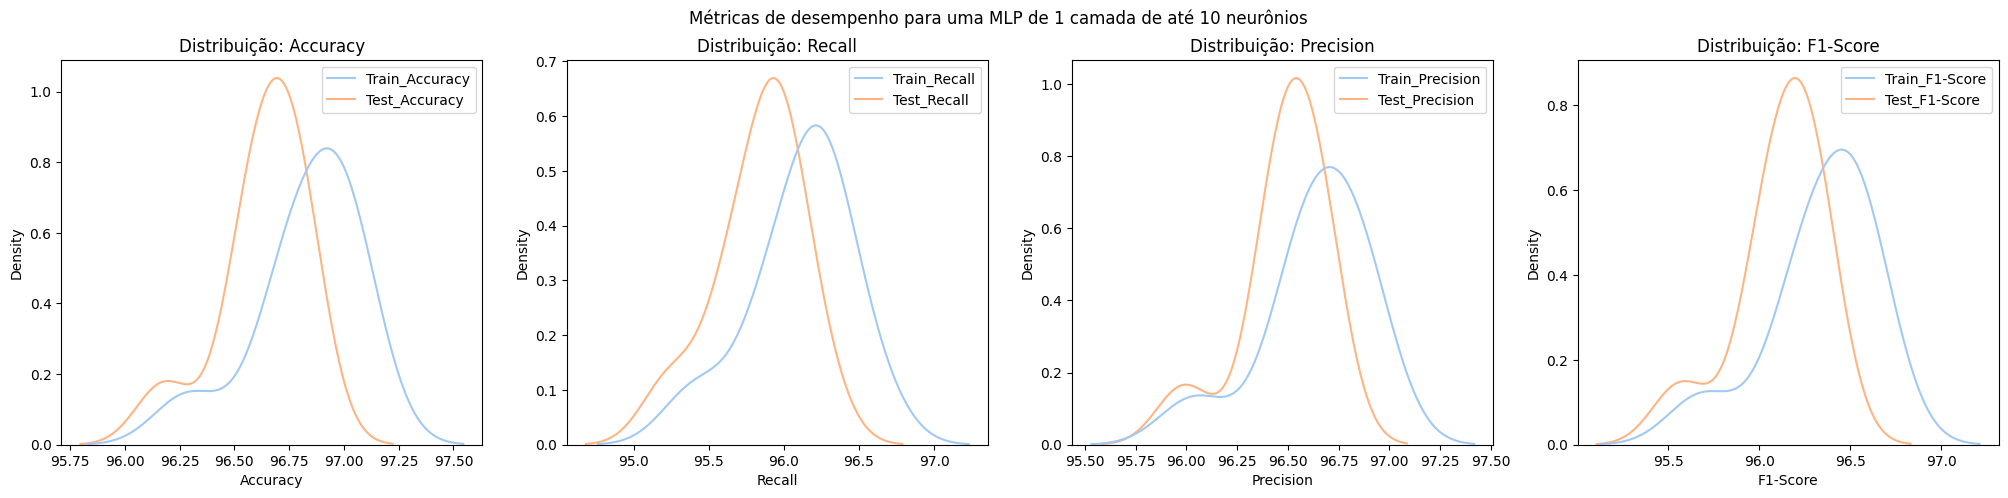

In [ ]:
plot_metrics(train_set1, test_set1, 'Métricas de desempenho para uma MLP de 1 camada de até 10 neurônios', (25, 5))

Com base no gráfico que correlaciona as métricas de desempenho para uma MLP com uma camada de até 10 neurônios, destaca-se que o conjunto de treino demonstrou uma eficácia superior em comparação ao conjunto de teste. Em todas as quatro métricas - acurácia, recall, precisão e F1-score - as incidências no gráfico estão posicionadas mais à direita, indicando valores mais elevados. Além disso, é relevante analisar a densidade do conjunto de teste; embora tenha sido menos eficiente que o conjunto de treino, a densidade atingiu picos próximos a 1, sugerindo que uma parcela significativa dos resultados expressa valores semelhantes para a métrica correspondente nesse ponto específico.

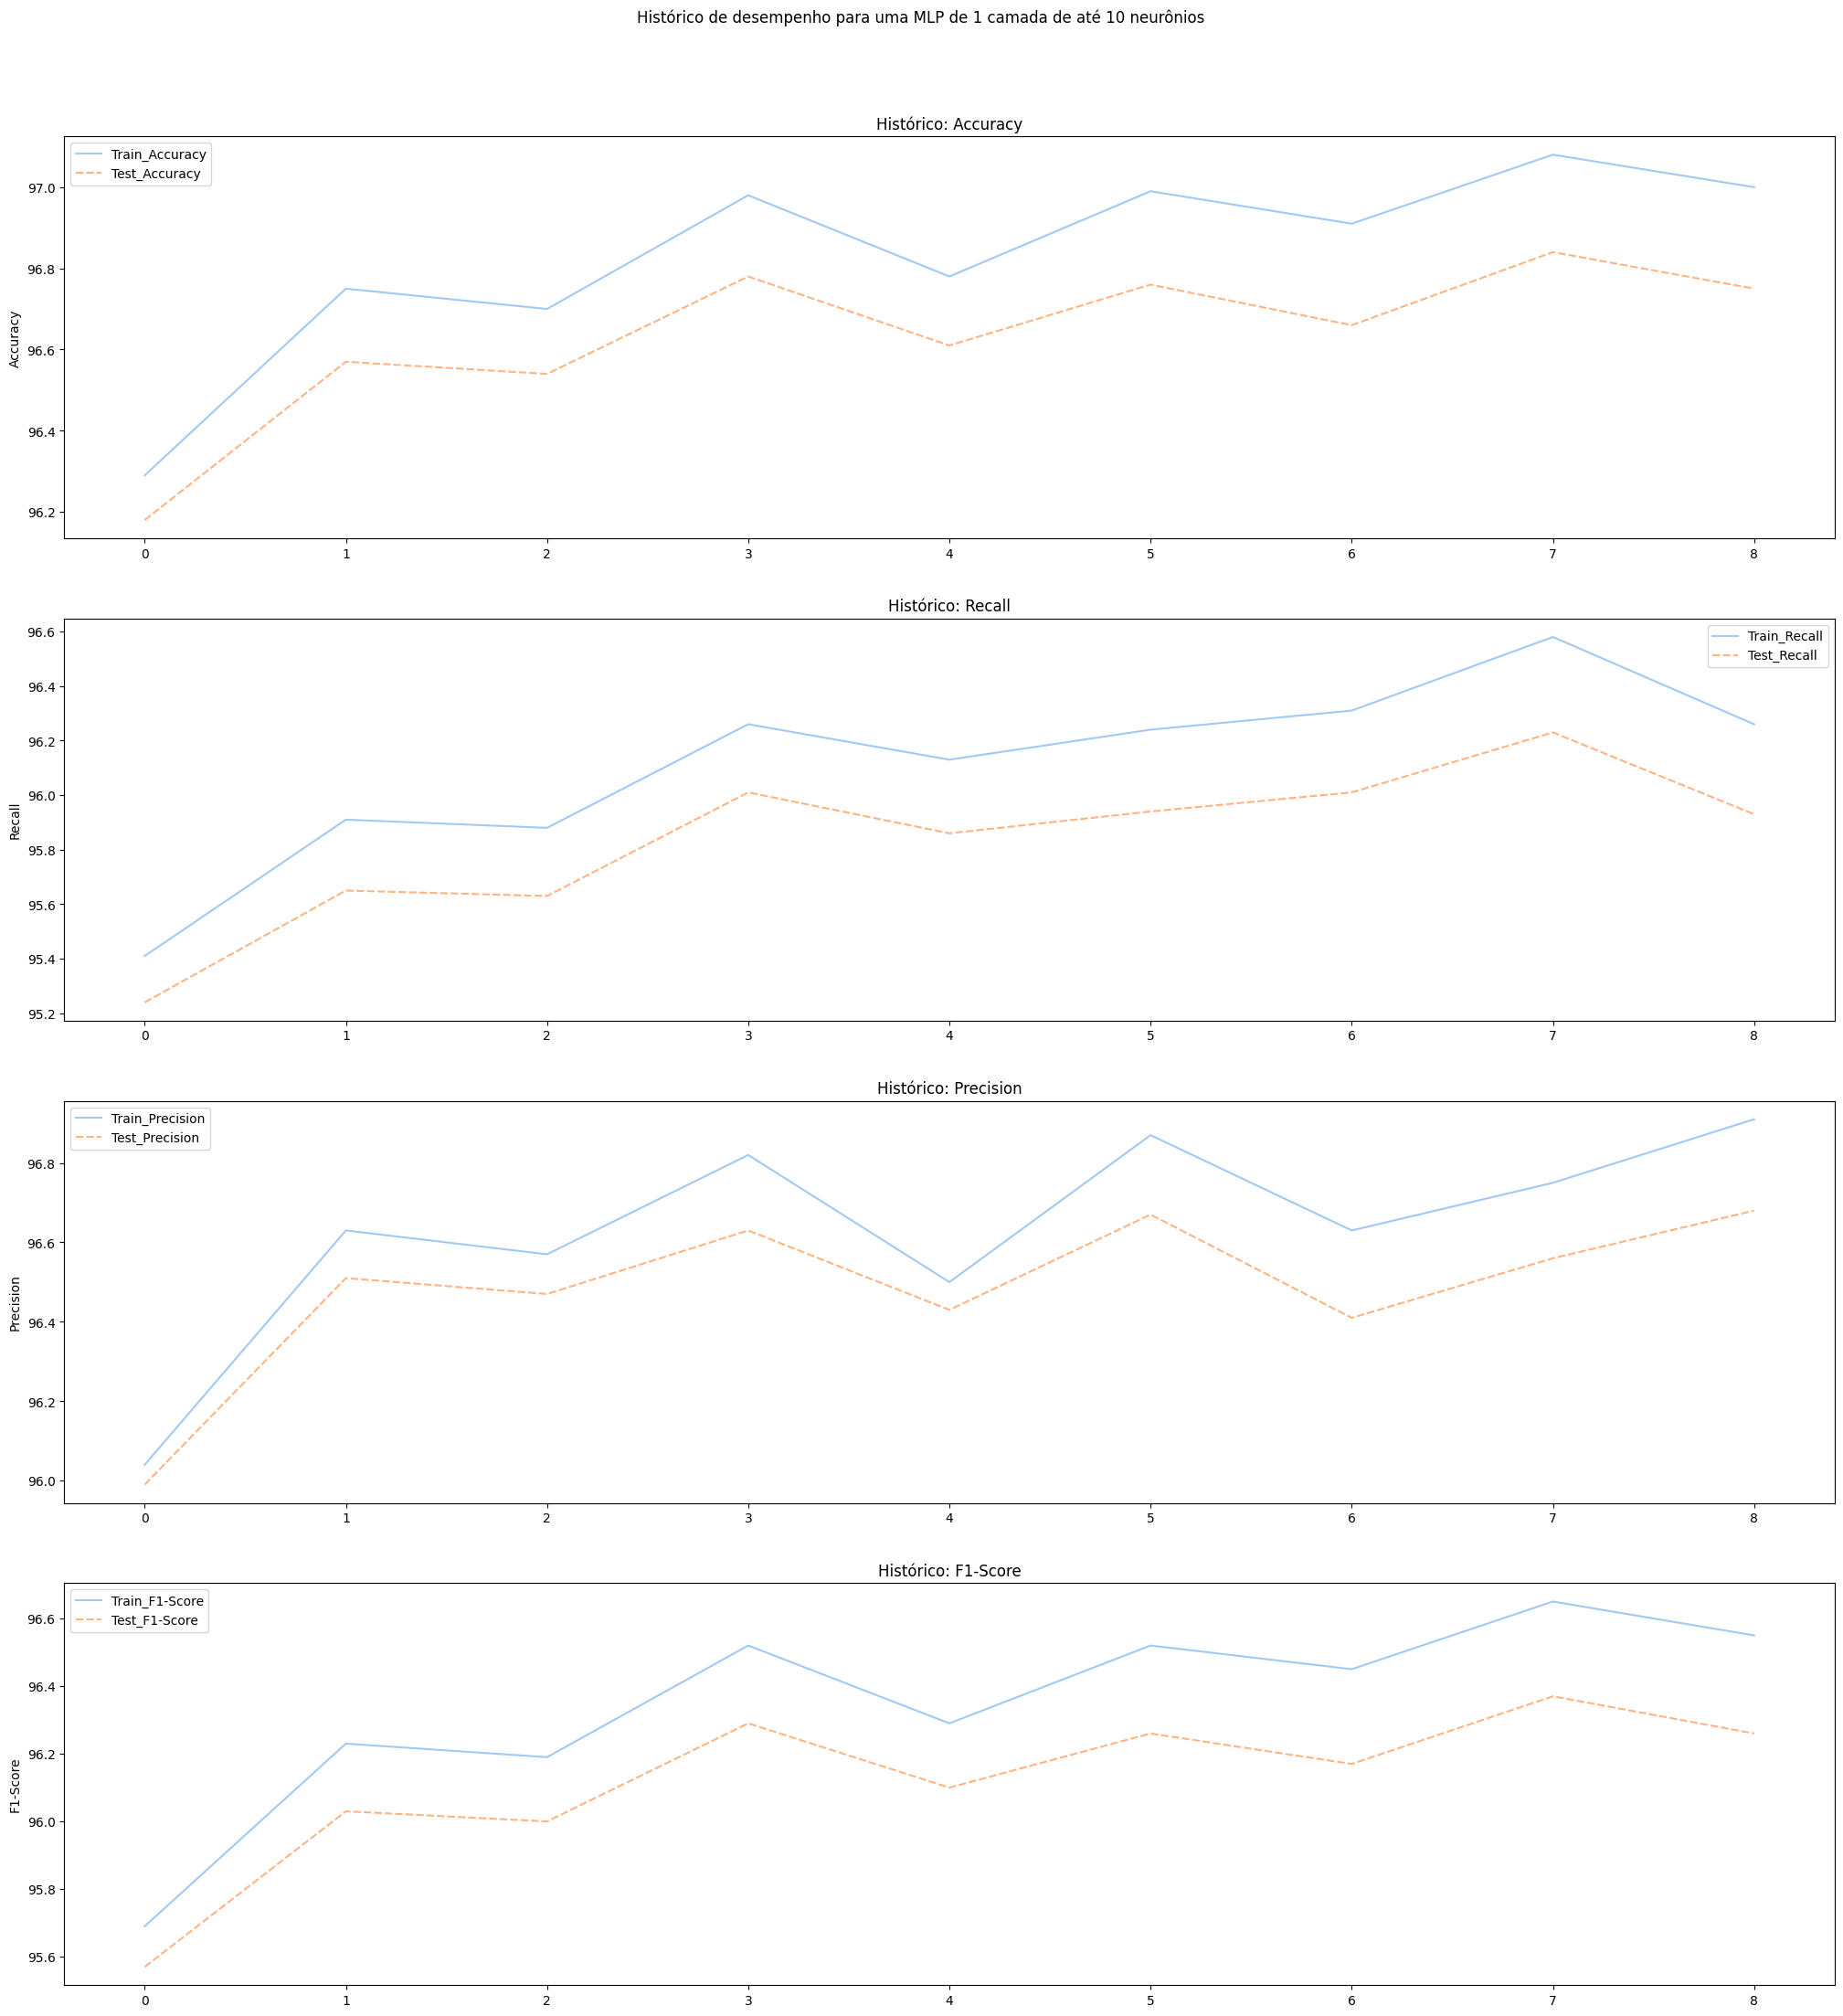

In [ ]:
plot_history(train_set1, test_set1, 'Histórico de desempenho para uma MLP de 1 camada de até 10 neurônios', (25, 7))

Com base na análise do histórico de desempenho de uma MLP com uma camada de até 10 neurônios, é evidente que, ao longo da variação de neurônios, o conjunto de treino apresentou uma eficiência superior em todas as métricas. Um padrão intrigante surgiu durante o aumento da quantidade de neurônios: o primeiro neurônio impulsiona positivamente as métricas, o próximo neurônio causa uma diminuição mínima, e o padrão alterna entre aumentos e quedas até a quantidade máxima de neurônios analisada.

É interessante notar que, para as métricas de acurácia, recall e F1-score, o valor máximo foi alcançado com 7 neurônios, enquanto para a precisão, o desempenho ideal ocorreu com 8 neurônios. Este padrão de variação destaca a complexidade da relação entre o número de neurônios e o desempenho das métricas, fornecendo insights valiosos para otimizar o modelo.


In [ ]:
# Calculando as métricas de desempenho Acurácia, Recall, Precision e F1-Score
# para cada uma rede neural MLP de 2 camadas que variam de 2 até 10 neurônios
# cada.
train_set2 = pd.DataFrame(columns=columns)
test_set2 = pd.DataFrame(columns=columns)

for i in range(2, 11):
    for j in range(1, i+1):
        train_scores2, test_scores2 = train_and_test((i, j))
        train_set2.loc[len(train_set2)] = train_scores2
        test_set2.loc[len(test_set2)] = test_scores2

train_set2

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Accuracy,Recall,Precision,F1-Score
0,96.39,95.38,96.30,95.79
1,96.59,95.48,96.71,96.05
2,59.45,33.33,19.82,24.86
3,96.65,95.91,96.41,96.13
4,95.46,93.66,95.80,94.59
5,96.64,95.97,96.38,96.15
6,96.73,95.77,96.73,96.20
7,96.74,95.76,96.77,96.23
8,96.95,96.02,97.00,96.46
9,96.82,95.97,96.73,96.32


In [ ]:
# Resultados das métricas para o teste
test_set2

,Accuracy,Recall,Precision,F1-Score
0,96.25,95.14,96.24,95.63
1,96.39,95.18,96.56,95.81
2,59.44,33.33,19.81,24.85
3,96.52,95.69,96.35,95.97
4,95.26,93.36,95.67,94.35
5,96.37,95.65,96.13,95.85
6,96.54,95.49,96.58,95.97
7,96.59,95.58,96.64,96.06
8,96.81,95.83,96.88,96.30
9,96.62,95.67,96.58,96.08


Observa-se uma predominância de resultados consistentemente superiores a 90% em <b>todas<b> as métricas de desempenho, tanto nos dados de treinamento quanto nos de teste. No entanto, destaca-se a execução de ID = 2, que se destoa ao apresentar valores consideravelmente mais baixos nas métricas avaliadas: 59% em Acurácia, 33% em Recall, 19% em Precisão e 24% em F1-Score. Essa disparidade é evidente tanto nos conjuntos de dados de treinamento quanto nos de teste.

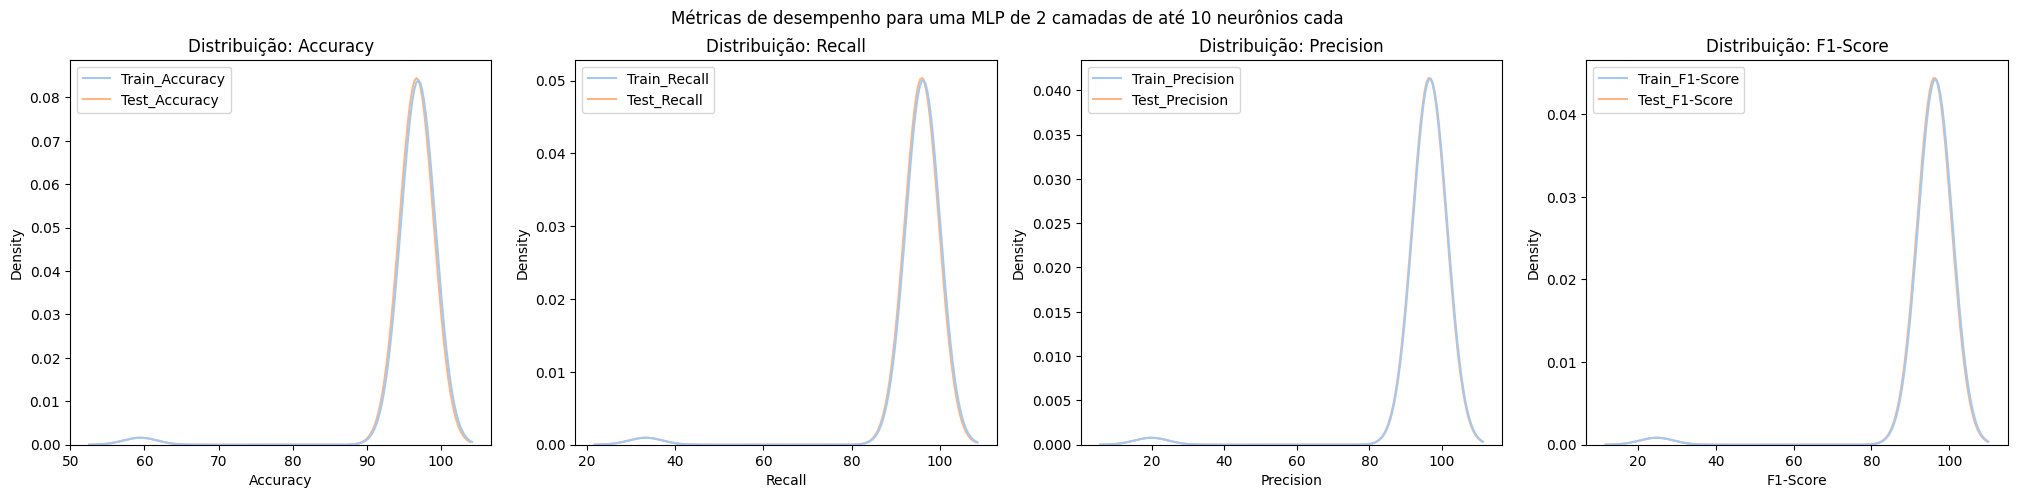

In [ ]:
plot_metrics(train_set2, test_set2, 'Métricas de desempenho para uma MLP de 2 camadas de até 10 neurônios cada', (25, 5))

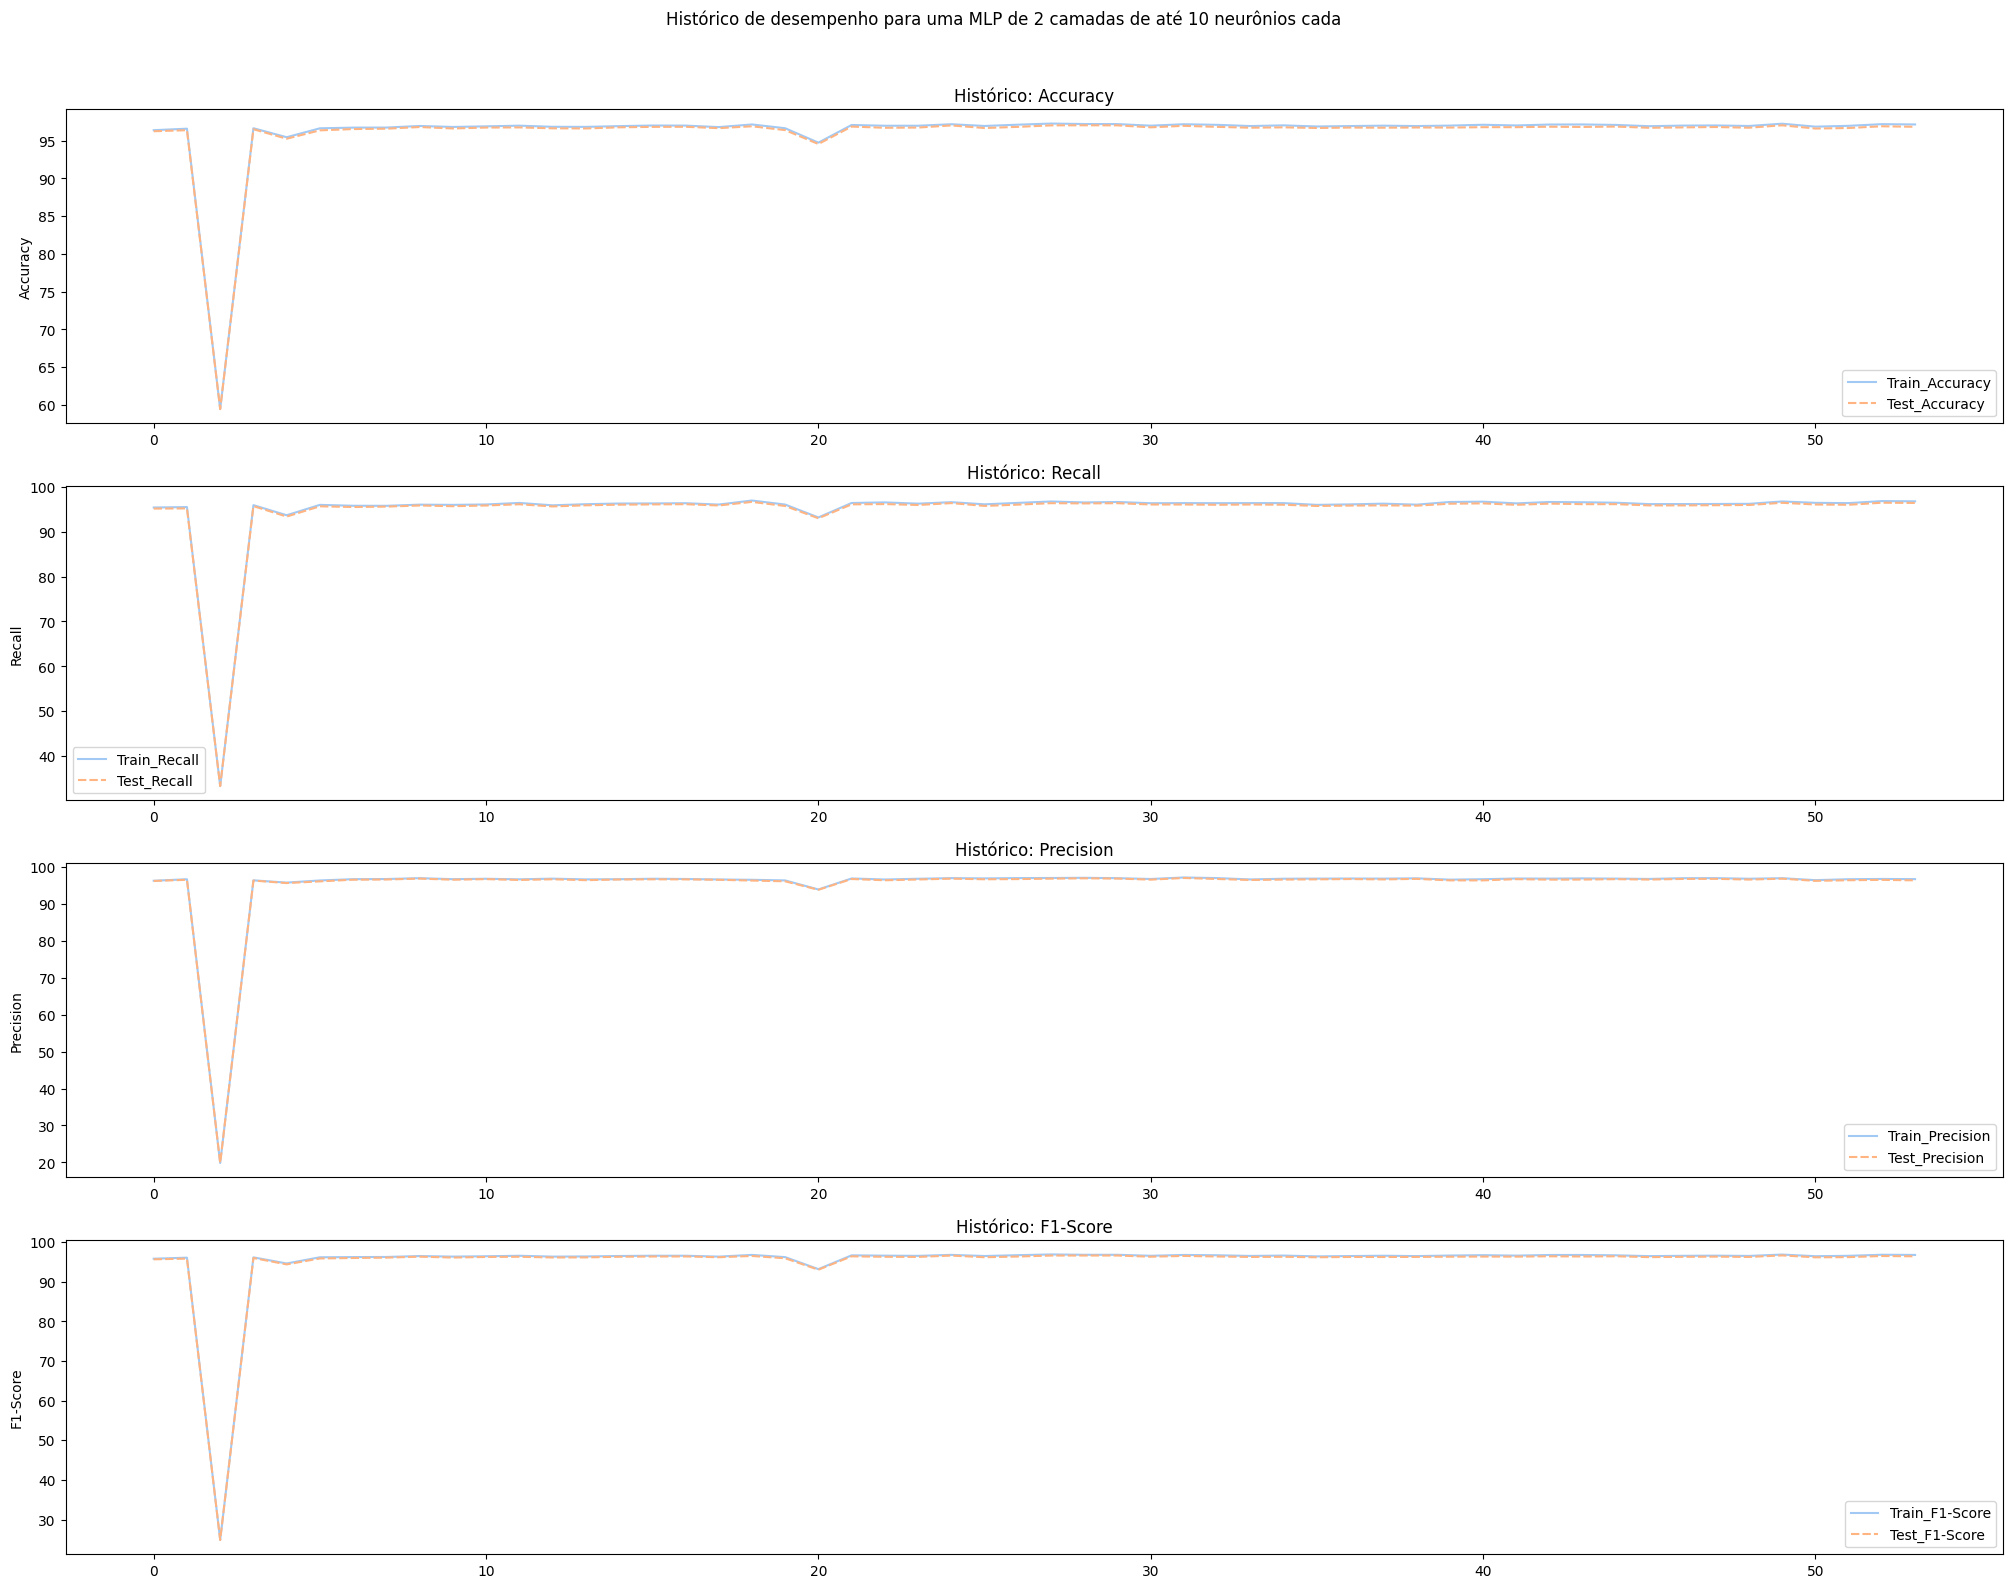

In [ ]:
plot_history(train_set2, test_set2, 'Histórico de desempenho para uma MLP de 2 camadas de até 10 neurônios cada', (25, 5))

Ao contrário da primeira mudança, notamos agora que as métricas de desempenho exibem valores semelhantes tanto nos conjuntos de treino quanto de teste. Essa uniformidade representa uma vantagem, indicando uma consistência notável entre a capacidade do modelo de se ajustar aos dados de treinamento e de generalizar para dados não vistos. É relevante destacar que o pico dos valores se encontra à direita do gráfico, sugerindo que, em sua maioria, o modelo atingiu valores altos de desempenho. No entanto, é interessante observar que o desempenho para o conjunto identificado como ID=2 se destoou significativamente, exibindo valores substancialmente mais baixos em comparação com os demais conjuntos. Isso se deve ao fato de que a rede teve três neurônios na primeira camada e apenas um na segunda.

Ao considerar a mudança na arquitetura da rede neural, passamos de uma MLP de uma camada com até 10 neurônios na primeira análise para uma MLP de duas camadas, cada uma com a capacidade de ter até 10 neurônios. Essa diferenciação na estrutura da rede neural pode explicar as variações nos resultados. O aumento na complexidade da rede, com a adição de uma camada extra, pode permitir ao modelo capturar padrões mais intrincados nos dados. Isso, por sua vez, pode impactar o desempenho de maneira diversa, levando a diferenças notáveis em comparação com a análise anterior.

In [ ]:
# Calculando as métricas de desempenho Acurácia, Recall, Precision e F1-Score
# para cada uma rede neural MLP de 3 camadas que variam de 2 até 10 neurônios
# cada.
train_set3 = pd.DataFrame(columns=columns)
test_set3 = pd.DataFrame(columns=columns)

for i in range(2, 11):
    for j in range(1, i+1):
        for k in range(1, j+1):
            train_scores3, test_scores3 = train_and_test((i, j, k))
            train_set3.loc[len(train_set3)] = train_scores3
            test_set3.loc[len(test_set3)] = test_scores3

train_set3

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Accuracy,Recall,Precision,F1-Score
0,96.32,95.19,96.33,95.70
1,59.45,33.33,19.82,24.86
2,96.61,95.68,96.54,96.06
3,96.36,95.39,96.25,95.77
4,59.45,33.33,19.82,24.86
...,...,...,...,...
214,97.02,96.54,96.69,96.60
215,97.28,96.74,97.09,96.89
216,97.26,96.82,96.92,96.87
217,97.05,96.36,96.95,96.64


In [ ]:
#Resultados das métricas para o teste
test_set3

,Accuracy,Recall,Precision,F1-Score
0,96.19,94.94,96.30,95.54
1,59.44,33.33,19.81,24.85
2,96.42,95.38,96.41,95.83
3,96.14,95.05,96.08,95.50
4,59.44,33.33,19.81,24.85
...,...,...,...,...
214,96.76,96.20,96.47,96.31
215,96.95,96.31,96.77,96.51
216,96.96,96.43,96.66,96.53
217,96.67,95.84,96.62,96.21


Ao empregar um modelo com três camadas, nota-se um desempenho notável, evidenciado por valores consistentemente superiores a 90% em todas as métricas avaliadas. No entanto, uma exceção sobressai das demais, sendo ela a execução de ID = 1, que apresenta resultados substancialmente mais baixos: 59% em Acurácia, 33% em Recall, 19% em Precisão e 24% em F1-Score. Essa discrepância é perceptível tanto nos conjuntos de dados de treinamento quanto nos de teste.

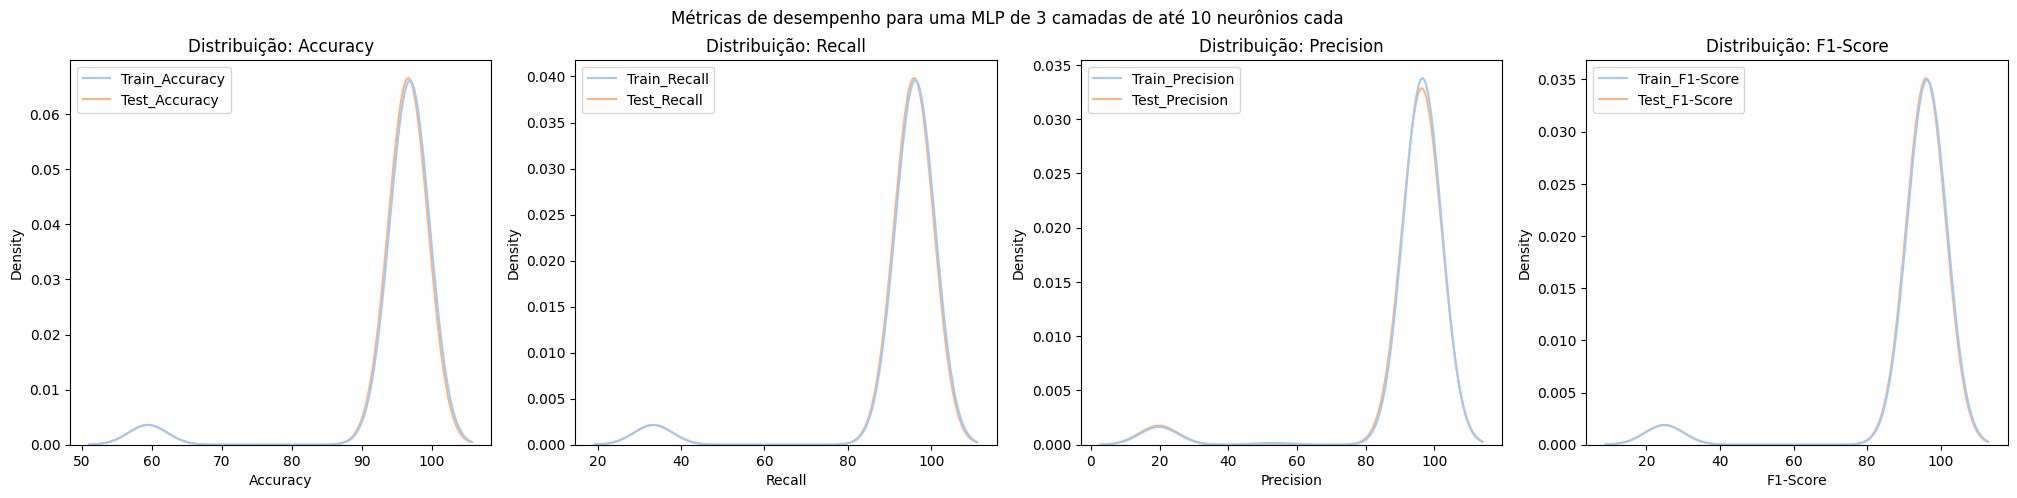

In [ ]:
plot_metrics(train_set3, test_set3, 'Métricas de desempenho para uma MLP de 3 camadas de até 10 neurônios cada', (25, 5))

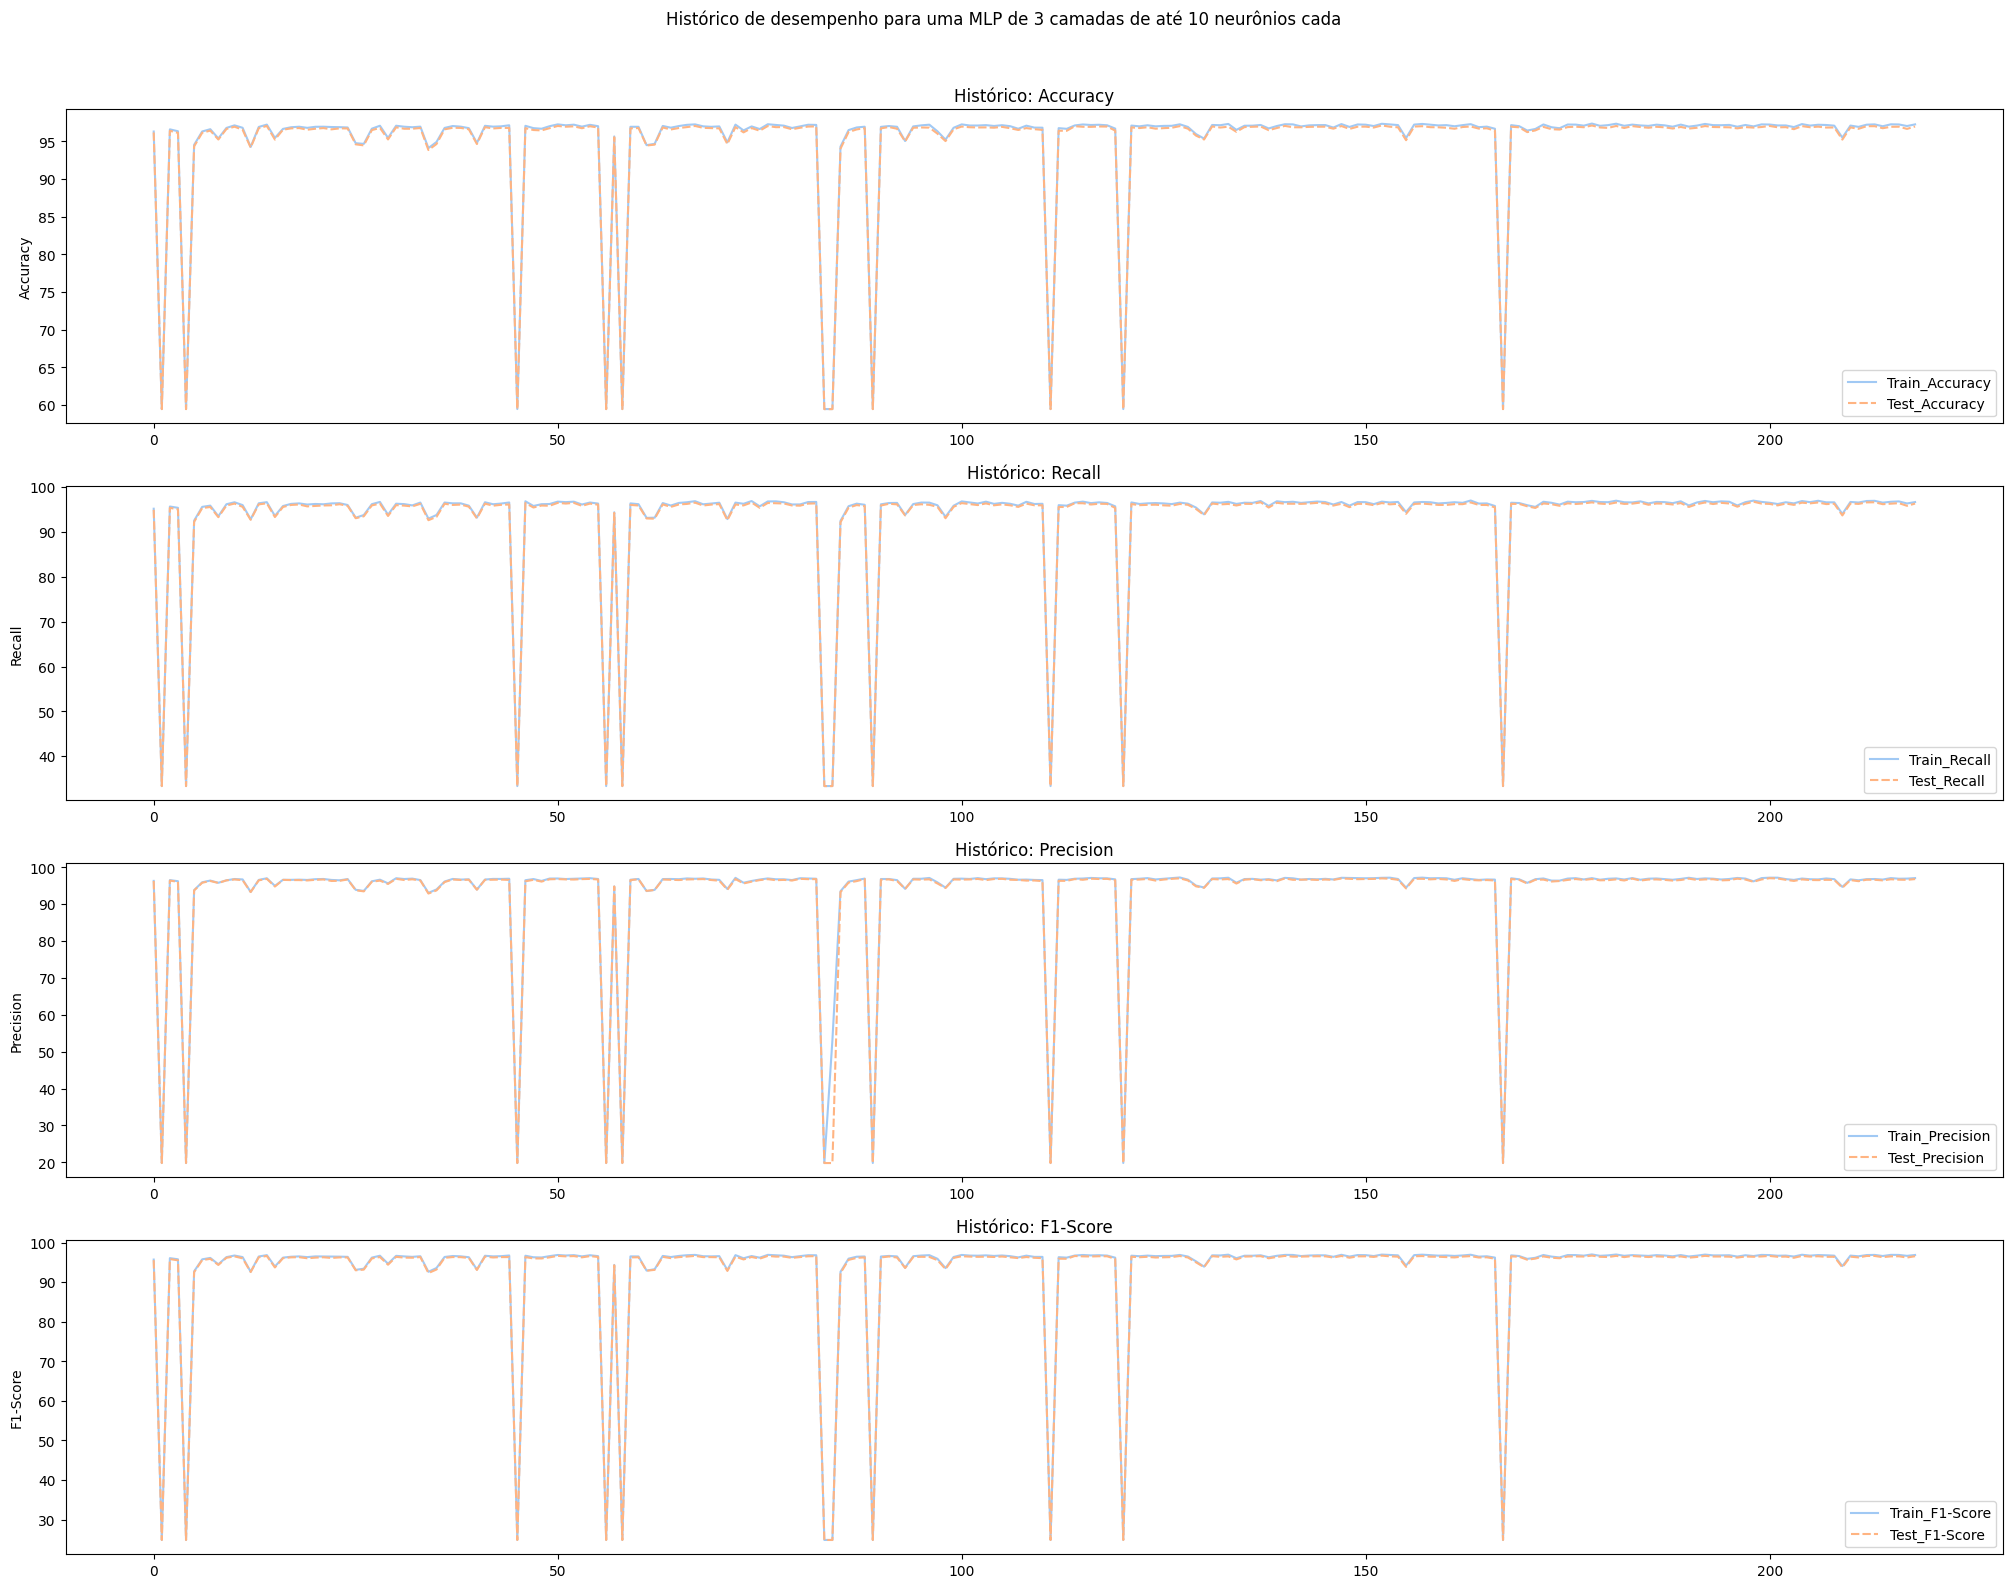

In [ ]:
plot_history(train_set3, test_set3, 'Histórico de desempenho para uma MLP de 3 camadas de até 10 neurônios cada', (25, 5))

Finalmente, observamos que, mais uma vez, os resultados para os conjuntos de treinamento e teste apresentaram valores próximos. No entanto, ao analisar uma MLP de 3 camadas de até 10 neurônios cada notamos a presença de múltiplos picos de valores com métricas mais baixas. Essa observação pode ser atribuída ao aumento na complexidade da arquitetura da rede neural, resultando em uma gama mais ampla de possibilidades para o desempenho do modelo.

O fenômeno de múltiplos picos com métricas mais baixas pode indicar que a adição de uma terceira camada à MLP trouxe consigo desafios adicionais. O modelo agora precisa aprender representações mais profundas e complexas dos dados, o que pode resultar em variações significativas no desempenho, dependendo das configurações específicas dos neurônios em cada camada.

# Conclusão

Em conclusão, a classificação de estrelas, galáxias e quasares com base em características espectrais é uma abordagem fundamental na astronomia, proporcionando insights essenciais para entender a diversidade e evolução do universo. Este projeto utilizou dados do Sloan Digital Sky Survey para explorar e analisar essas classificações, destacando padrões e relações interessantes entre diferentes variáveis.

A análise exploratória de dados revelou correlações significativas, indicando observações próximas no tempo que são cruciais para estudos de cosmologia. A distribuição das classes estelares mostrou uma predominância de galáxias, seguidas por estrelas e quasares, evidenciando a importância de compreender a distribuição e prevalência dessas categorias.

A implementação de um modelo de Machine Learning, especificamente uma Rede Neural Multicamada (MLP), permitiu a classificação automática das observações. A análise detalhada das variações nos parâmetros da MLP revelou padrões complexos, destacando a influência do número de neurônios e camadas na eficácia do modelo. A consistência entre as métricas de treinamento e teste sugere que o modelo é capaz de generalizar eficientemente para dados não vistos, enquanto as variações nas arquiteturas da MLP indicam desafios adicionais ao lidar com representações mais profundas e complexas dos dados.

Em última análise, este projeto contribui para o entendimento mais amplo da classificação estelar e destaca a importância da integração de abordagens estatísticas avançadas para lidar com conjuntos de dados astronômicos complexos. À medida que a astronomia avança, a combinação de observações detalhadas e técnicas de Machine Learning continuará a desempenhar um papel crucial na exploração do vasto e fascinante cosmos.